In [1]:
import pandas as pd
import requests
import json

In [2]:
symbol = 'RXN'
#symbol = 'F'
url = 'https://financialmodelingprep.com/api/v3/financial-ratios/' + symbol
fr = requests.get(url)

In [45]:
def simple_df(cat, indicator):
    def func(i):
        return float(fr['ratios'][i][cat][indicator])
    r = list(map(func, range(len(fr['ratios']))))

    df = make_df(years,r,indicator)
    return df

In [3]:
fr = fr.json()
fr

{'symbol': 'RXN',
 'ratios': [{'date': '2019-03-31',
   'investmentValuationRatios': {'priceBookValueRatio': '2.3098134461989255',
    'priceToBookRatio': '2.3098134461989255',
    'priceToSalesRatio': '1.3837031547125653',
    'priceEarningsRatio': '82.7357667638484',
    'receivablesTurnover': '6.13490876458271',
    'priceToFreeCashFlowsRatio': '13.162508348794063',
    'priceToOperatingCashFlowsRatio': '10.995105772956219',
    'priceCashFlowRatio': '10.995105772956219',
    'priceEarningsToGrowthRatio': '114.0641717281831',
    'priceSalesRatio': '1.3837031547125653',
    'dividendYield': '0.008175241085040549',
    'enterpriseValueMultiple': '9.47255082623936',
    'priceFairValue': '2.3098134461989255'},
   'profitabilityIndicatorRatios': {'niperEBT': '0.14363484087102177',
    'ebtperEBIT': '0.7814136125654451',
    'ebitperRevenue': '0.14900775269393923',
    'grossProfitMargin': '0.3826612706616607',
    'operatingProfitMargin': '0.14900775269393923',
    'pretaxProfitMargin'

In [4]:
fr['symbol']

'RXN'

In [5]:
len(fr['ratios'])

9

In [6]:
for i in range(len(fr['ratios'])):
    print(fr['ratios'][i]['date'])

2019-03-31
2018-03-31
2017-03-31
2016-03-31
2015-03-31
2014-03-31
2013-03-31
2012-03-31
2011-03-31


In [7]:

years=[]
for i in range(len(fr['ratios'])):
    years.append(fr['ratios'][i]['date'][0:4])
print (years)

['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']


In [8]:
for i in range(len(fr['ratios'])):
    print(fr['ratios'][i]['cashFlowIndicatorRatios']['cashPerShare'])

2.8268348623853212
2.2783932851408717
4.769690422664058
4.805585029898553
3.672806067172264
3.4554813719993884
5.460967782269829
4.46435259396863
5.8571


In [47]:
cat = 'liquidityMeasurementRatios'
indicator = 'currentRatio'

df = simple_df(cat,indicator)
df

,Year,currentRatio
0,2019,2.475819
1,2018,2.196609
2,2017,2.943043
3,2016,2.908259
4,2015,2.533288
5,2014,2.493437
6,2013,2.050477
7,2012,2.179114
8,2011,1.971000


# Current Ratio of > 2 - 

- tells how well a company can pay its short term bills

In [10]:
for i in range(len(fr['ratios'])):
    print(fr['ratios'][i]['cashFlowIndicatorRatios']['freeCashFlowPerShare'])

2.0603975535168195
1.80769860139187
1.3683298784463713
1.6550807707182595
1.9412981384812371
1.4127720299678916
0.8794231650898179
1.2104687570223667
2.0


In [11]:
indicator = 'operatingCashFlowPerShare'

for i in range(len(fr['ratios'])):
    print(fr['ratios'][i]['cashFlowIndicatorRatios'][indicator])

2.466551987767584
2.1994628882749856
1.89872801767345
2.171735702739957
2.4219442529301682
1.944855002293461
1.5056474805151503
2.0868601219457386
2.4642


## Free Cash Flow vs. Operating Cash Flow: An Overview

- Free cash flow is most commonly defined as operating cash flow minus capital expenditures. 
- Free cash flow also includes dividend outlays as a capital expenditure. 
- Capital expenditures are considered necessary to maintain a company's competitive position and operating efficiency.

- Operating cash flow should always be higher and maybe less indicative of success - tony

### So free cash flow
 is what is left over after **operating cash flow** pays for capital expenditures - things like land, buildings and machinery
 
## single best predictor of excess return


 'investmentValuationRatios': {'priceBookValueRatio': '3.346073149216258',
    'priceToBookRatio': '3.346073149216258',
    'priceToSalesRatio': '1.5019670433431818',
    'priceEarningsRatio': '36.99255813953488',
    'receivablesTurnover': '5.914429832462619',
    'priceToFreeCashFlowsRatio': '15.167972931405721',
    'priceToOperatingCashFlowsRatio': '12.518679867986798',
    'priceCashFlowRatio': '12.518679867986798',
    'priceEarningsToGrowthRatio': '6.591641766222246',
    'priceSalesRatio': '1.5019670433431818',
    'dividendYield': '0.018900417512656385',
    'enterpriseValueMultiple': '17.068873108984253',

In [12]:
indicator = 'dividendYield'

for i in range(len(fr['ratios'])):
    yieldr = (fr['ratios'][i]['investmentValuationRatios'][indicator])
    print(yieldr)

0.008175241085040549
0.007888211557101035
0.0018577498557974452
-0
-0






In [13]:
def make_df(list1, list2, cat):
    df = pd.DataFrame(list(zip(list1, list2)), 
               columns =['Year', cat]) 
    return df

In [42]:
cat = 'investmentValuationRatios'
indicator = 'priceEarningsRatio'

df = simple_df(cat,indicator)

In [43]:
df

,Year,priceEarningsRatio
0,2019,82.735767
1,2018,38.749639
2,2017,31.962978
3,2016,27.757265
4,2015,34.045263
5,2014,94.759035
6,2013,38.886858
7,2012,44.649498
8,2011,55.555600


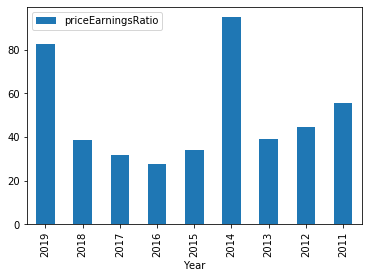

In [44]:
df.plot.bar(x='Year')

In [17]:
df[indicator].mean()

49.900211357918096

# Toss out outliers 

In [18]:
q_low = df[indicator].quantile(0.01)
q_hi  = df[indicator].quantile(0.99)

df_filtered = df[(df[indicator] < q_hi) & (df[indicator] > q_low)]

In [19]:
df_filtered

,Year,priceEarningsRatio
0,2019,82.735767
1,2018,38.749639
2,2017,31.962978
4,2015,34.045263
6,2013,38.886858
7,2012,44.649498
8,2011,55.555600


# Filtered PE - more the norm

In [20]:
print("AVG ",indicator)
int(df_filtered[indicator].mean())

AVG  priceEarningsRatio


46

## Earnings per share is a measure 

- of how much profit a company has generated. 
- Companies usually report their earnings per share on a quarterly or yearly basis.


- the difference between a company's net income and dividends paid for preferred stock and then dividing that figure by the average number of shares outstanding.


### Diluted earnings per share

- the diluted earnings-per-share calculation takes all convertible securities into consideration. A company might have convertible preferred shares or stock options that could theoretically become common stock. 


### Limitations of earnings per share
When a company's earnings increase, it's an indication that the company is doing well financially and that it's potentially a worthwhile investment. 

- But as a measure of a company's financial health, the earnings-per-share calculation has its limitations. 
    - Because companies have the option to buy back their own shares, they can improve their earnings per share by reducing their number of shares outstanding without actually increasing their net income. 
    - In this regard, companies can essentially manipulate investors into thinking they're doing better than they actually are. Furthermore, earnings per share does not take factors such as a company's outstanding debt into account.

- Finally, earnings per share does not consider the capital needed to generate the earnings in question. 
    - If two companies report the same earnings per share but one uses less capital to bring in that income



In [21]:
cat = 'investmentValuationRatios'
indicator = 'priceSalesRatio'

r = list(map(func, range(len(fr['ratios']))))
print(r)

[1.3837031547125653, 1.423570953533398, 1.2347287300594307, 0.9796851491839069, 1.3915681396936883, 1.374506652257445, 0.9716381227868935, 0.6778127538586515, 0.0]


In [22]:
df = make_df(years,r,indicator)
df

,Year,priceSalesRatio
0,2019,1.383703
1,2018,1.423571
2,2017,1.234729
3,2016,0.979685
4,2015,1.391568
5,2014,1.374507
6,2013,0.971638
7,2012,0.677813
8,2011,0.000000


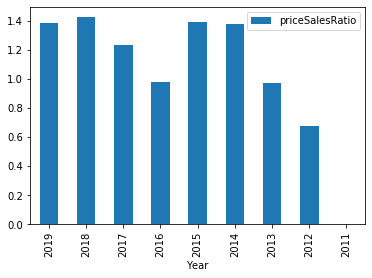

In [23]:
df.plot.bar(x='Year')

In [24]:
# Price to Sales is harder to manipulate - 

avgr=df[indicator].mean()
print( "so below this the stock may be a value")
print("AVG ",indicator)
df[indicator].mean()




so below this the stock may be a value
AVG  priceSalesRatio


1.0485792951206643

# macrotrends pretty cool
https://www.macrotrends.net/stocks/charts/RXN

profitabilityIndicatorRatios': {'niperEBT': '0.6852850374880849',
    'ebtperEBIT': '0.8889183976730216',
    'ebitperRevenue': '0.10813344423942998',
    'grossProfitMargin': '0.34745437345747704',
    'operatingProfitMargin': '0.10813344423942998',
    'pretaxProfitMargin': '0.09612180798817914',
    'netProfitMargin': '0.06587083679060184',

In [25]:
cat = 'profitabilityIndicatorRatios'
indicator = 'netProfitMargin'

for i in range(len(fr['ratios'])):
    yieldr = float(fr['ratios'][i][cat][indicator]) * 100
    print(yieldr)

1.672436491296504
3.673765730880929
3.8629965592743196
3.5294729181827633
4.0874061067212955
1.4505283381364074
2.498628497331804
1.5180747359870024
-3.0628694250403


# What Is Net Profit Margin?

The net profit margin is equal to how much net income or profit is generated as a percentage of revenue. 

- Net profit margin is the ratio of net profits to revenues for a company or business segment. 

The net profit margin illustrates how much of each dollar in revenue collected by a company translates into profit.


In [26]:
cat = 'profitabilityIndicatorRatios'
indicator = 'operatingProfitMargin'

for i in range(len(fr['ratios'])):
    yieldr = float(fr['ratios'][i][cat][indicator]) * 100
    print(yieldr)

14.900775269393923
7.120038722168441
9.576686476905433
9.060193367293898
9.93561603745976
13.429394812680115
12.737519325719415
12.276604386677498
100.0


In [27]:
def func(i):
    return float(fr['ratios'][i][cat][indicator]) * 100
r = list(map(func, range(len(fr['ratios']))))
print(r)
                            

[14.900775269393923, 7.120038722168441, 9.576686476905433, 9.060193367293898, 9.93561603745976, 13.429394812680115, 12.737519325719415, 12.276604386677498, 100.0]


In [28]:

# import pandas as pd 
import pandas as pd 
  
# list of strings 
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks'] 
  
# list of int 
lst2 = [11, 22, 33, 44, 55, 66, 77] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Name', 'val']) 
df 


,Name,val
0,Geeks,11
1,For,22
2,Geeks,33
3,is,44
4,portal,55
5,for,66
6,Geeks,77


In [29]:
def func(i):
    return float(fr['ratios'][i][cat][indicator]) * 100
r = list(map(func, range(len(fr['ratios']))))
print(r)

years=[]
for i in range(len(fr['ratios'])):
    years.append(fr['ratios'][i]['date'][0:4])
print (years)

[14.900775269393923, 7.120038722168441, 9.576686476905433, 9.060193367293898, 9.93561603745976, 13.429394812680115, 12.737519325719415, 12.276604386677498, 100.0]
['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']


In [30]:
df = pd.DataFrame(list(zip(years, r)), 
               columns =['Year', 'operatingProfitMargin']) 
df 


,Year,operatingProfitMargin
0,2019,14.900775
1,2018,7.120039
2,2017,9.576686
3,2016,9.060193
4,2015,9.935616
5,2014,13.429395
6,2013,12.737519
7,2012,12.276604
8,2011,100.000000


# avg operating profit margin for s&p is 10



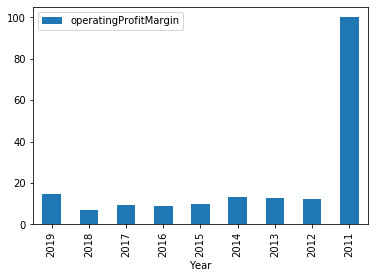

In [31]:
df.plot.bar(x='Year')

In [32]:
#priceToFreeCashFlowsRatio

def func(i):
    return float(fr['ratios'][i][cat][indicator])


r = list(map(func, range(len(fr['ratios']))))
print(r)




[0.14900775269393923, 0.07120038722168441, 0.09576686476905433, 0.09060193367293898, 0.0993561603745976, 0.13429394812680115, 0.12737519325719415, 0.12276604386677498, 1.0]


In [33]:
cat = 'investmentValuationRatios'
indicator = 'priceToFreeCashFlowsRatio'

def func(i):
    return float(fr['ratios'][i][cat][indicator])
r = list(map(func, range(len(fr['ratios']))))
print(r)

df = make_df(years,r,indicator)

[13.162508348794063, 15.66079653887114, 16.845353129445236, 11.292500239664472, 14.474850329781837, 20.64735101010101, 23.08331279620853, 16.52252475247525, 13.701]


In [34]:
df

,Year,priceToFreeCashFlowsRatio
0,2019,13.162508
1,2018,15.660797
2,2017,16.845353
3,2016,11.292500
4,2015,14.474850
5,2014,20.647351
6,2013,23.083313
7,2012,16.522525
8,2011,13.701000


In [35]:
def simple_df(cat, indicator):
    def func(i):
        return float(fr['ratios'][i][cat][indicator])
    r = list(map(func, range(len(fr['ratios']))))

    df = make_df(years,r,indicator)
    return df

In [36]:
my_df = simple_df(cat, indicator)

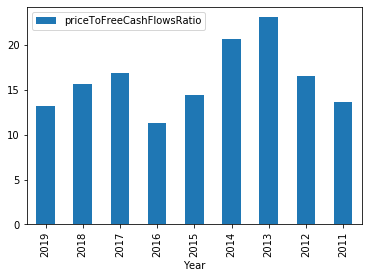

In [37]:
my_df.plot.bar(x='Year')

https://www.macrotrends.net/stocks/charts/CR/crane/price-fcf

https://www.macrotrends.net/stocks/charts/CR/crane/total-assets

https://www.macrotrends.net/stocks/charts/CR/crane/net-worth

In [38]:
 #Price to FCF is harder to manipulate - 

avgr=df[indicator].mean()
print( "so below this the stock may be a value")
print("AVG ",indicator)
my_df[indicator].mean()

so below this the stock may be a value
AVG  priceToFreeCashFlowsRatio


16.15446634948239

In [39]:
def toss_outliers(df):
    q_low = df[indicator].quantile(0.01)
    q_hi  = df[indicator].quantile(0.99)

    df_filtered = df[(df[indicator] < q_hi) & (df[indicator] > q_low)]
    return df_filtered

In [40]:
my_df=toss_outliers(my_df)
avgr=df[indicator].mean()
print( "so below this the stock may be a value")
print("AVG ",indicator)
my_df[indicator].mean()

so below this the stock may be a value
AVG  priceToFreeCashFlowsRatio


15.859197729924075

profitabilityIndicatorRatios': {'niperEBT': '0.7809021675454013',
    'ebtperEBIT': '0.8113117870722434',
    'ebitperRevenue': '0.06408577259297615',
    'grossProfitMargin': '0.3591118150528464',
    'operatingProfitMargin': '0.06408577259297615',
    'pretaxProfitMargin': '0.051993542688312876',
    'netProfitMargin': '0.04060187018366788',
    'effectiveTaxRate': '0.2173403632103105',cat = 'investmentValuationRatios'
indicator = 'priceToFreeCashFlowsRatio'

    'returnOnAssets': '0.030133146461107218',
    'returnOnEquity': '0.09045260229354686',

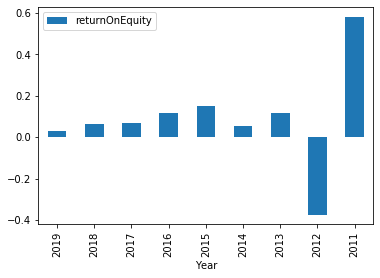

In [41]:
cat = 'profitabilityIndicatorRatios'
indicator = 'returnOnEquity'

my_df = simple_df(cat, indicator)

my_df.plot.bar(x='Year')


# ROE

some people consider this the ultimate measure of a stocks success

|market cap | measure|

| Market Cap | Measure |
| ------ | ----------- |
| Gigantic  | > $25 Billion |
| Large | 5 to 25 Billion |
| Medium | 1 to 5 Billion |
| Small | up to 1 Billion |
| Micro | up to 250 Million|

https://www.macrotrends.net/stocks/charts/CR/crane/net-worth

on March 24, 2020 fell to 2.2 Billion from 5.2 Billion just months earlier
    
https://www.macrotrends.net/stocks/charts/AAPL/apple/net-worth

https://www.macrotrends.net/stocks/charts/AAPL/apple/net-worth

1.3 Trillion to 1.0 Trillion

# Buying what the headlines tell you

## **Doesn't WORK**

### *Nobody Ever knows what THE MARKET will do*!!!

### Every STock has

1. A business Valuation
2. A market valuation

### Graham
1. price to book near 1
2. PE lower - less than 15 - oversimplification?

A few superior companies are better than a slew of mediocre ones - Fischer